# Exploratory Data Analysis (EDA): Footwear Sales (2018–2026)

Before building models or drawing conclusions, it is essential to develop a strong understanding of the dataset. Exploratory Data Analysis (EDA) helps us examine just that.

In this section, we will:
- Review the overall structure of the dataset (features, data types, and size)
- Identify inconsistent entries
- Detect potential outliers
- Assess whether any variables require cleaning, transformation, or further investigation

By performing this initial analysis, we ensure that the dataset is reliable and well-prepared for deeper statistical analysis and visualization.

--------------------------------------------------------------

## 1. Import the neccesary packages:
Importing the python packages I will be using to better understand the data <br>
Create a .venv from the requirements.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as ws
ws.filterwarnings("ignore")

## 2. Explore the dataset and import the CSV
Import the data from the dataset and start ot analyze it. 

In [2]:
df_sales = pd.read_csv("../../Databases/global_sports_footwear_sales_2018_2026.csv")
df_sales.sample(5)

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
28867,ORD128867,2018-05-07,Reebok,Model-433,Running,Unisex,7,Black,177,0,177.0,3,531.0,Cash,Retail Store,Germany,Low,3.4
18872,ORD118872,2026-05-26,Adidas,Model-223,Gym,Unisex,6,Grey,78,20,62.4,2,124.8,Cash,Online,Pakistan,Low,3.7
27912,ORD127912,2020-05-27,Reebok,Model-945,Running,Women,7,Grey,211,10,189.9,2,379.8,Wallet,Online,Germany,Low,4.4
20981,ORD120981,2022-12-05,Puma,Model-421,Gym,Unisex,7,White,145,0,145.0,1,145.0,Wallet,Online,UAE,Medium,4.1
29874,ORD129874,2018-01-15,Reebok,Model-955,Lifestyle,Unisex,9,Grey,65,0,65.0,1,65.0,Cash,Online,Germany,Low,3.5


Now we’ll check the data types for each column and check the summary of the numerical columns so we can determine our next action.

In [3]:
df_sales.info()

<class 'pandas.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               30000 non-null  str    
 1   order_date             30000 non-null  str    
 2   brand                  30000 non-null  str    
 3   model_name             30000 non-null  str    
 4   category               30000 non-null  str    
 5   gender                 30000 non-null  str    
 6   size                   30000 non-null  int64  
 7   color                  30000 non-null  str    
 8   base_price_usd         30000 non-null  int64  
 9   discount_percent       30000 non-null  int64  
 10  final_price_usd        30000 non-null  float64
 11  units_sold             30000 non-null  int64  
 12  revenue_usd            30000 non-null  float64
 13  payment_method         30000 non-null  str    
 14  sales_channel          30000 non-null  str    
 15  country      

### Key Data Integrity Observations

- No null values were detected across any of the columns.
- All columns contain approximately 30,000 records, indicating that the dataset does not have missing entries.
- The majority of features are stored as string (`str`) data types, which should be carefully considered when designing SQL tables and defining appropriate column types.
- There are no object types which is good for data integrity and keeps a consistent wokflow

In [4]:
df_sales.describe()

,size,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,customer_rating
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,8.500867,139.634633,13.332167,121.029035,2.500200,302.714948,4.001543
std,1.710896,46.062549,9.864198,42.511586,1.121149,179.149272,0.577546
min,6.000000,60.000000,0.000000,42.000000,1.000000,42.000000,3.000000
25%,7.000000,100.000000,5.000000,85.000000,1.000000,156.750000,3.500000
50%,9.000000,140.000000,10.000000,119.200000,3.000000,268.200000,4.000000
75%,10.000000,180.000000,20.000000,153.600000,4.000000,414.000000,4.500000
max,11.000000,219.000000,30.000000,219.000000,4.000000,876.000000,5.000000


### Key Data Description Observations

- Data is daily based on units sold that range from min. 1.0 to max. 4.0 and which is further confirmed by checking the Model-686 sample below.
- From a business standpoint discounts range from 0% to 30% at max
- Customer rating ranges probably from 0 to 5 but the std is so low and the mean is 4 so that means rating mainly are in the upper ratings

In [5]:
df_sales[df_sales["model_name"] == "Model-686"].sample(5)

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
14907,ORD114907,2026-09-17,Adidas,Model-686,Running,Men,11,White,65,0,65.0,4,260.0,Cash,Online,India,Medium,3.4
6162,ORD106162,2026-03-17,Adidas,Model-686,Lifestyle,Women,9,Blue,127,0,127.0,3,381.0,Card,Online,UK,Medium,4.2
18213,ORD118213,2024-12-31,ASICS,Model-686,Training,Men,11,Blue,141,30,98.7,1,98.7,Wallet,Retail Store,UK,High,3.2
7813,ORD107813,2023-05-09,Nike,Model-686,Lifestyle,Men,9,White,189,0,189.0,4,756.0,Bank Transfer,Retail Store,India,High,4.6
25027,ORD125027,2020-11-10,ASICS,Model-686,Gym,Men,10,White,180,20,144.0,4,576.0,Cash,Online,India,Medium,4.0


In [6]:
# Change the data type of some of the variables for memory saving purposes
convert_dict = {
    'brand': 'category',
    'category': 'category',
    'gender': 'category',
    'color': 'category',
    'payment_method': 'category',
    'sales_channel': 'category',
    'country': 'category',
    'customer_income_level': 'category'
}

df_sales = df_sales.astype(convert_dict)
df_sales.info()

<class 'pandas.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               30000 non-null  str     
 1   order_date             30000 non-null  str     
 2   brand                  30000 non-null  category
 3   model_name             30000 non-null  str     
 4   category               30000 non-null  category
 5   gender                 30000 non-null  category
 6   size                   30000 non-null  int64   
 7   color                  30000 non-null  category
 8   base_price_usd         30000 non-null  int64   
 9   discount_percent       30000 non-null  int64   
 10  final_price_usd        30000 non-null  float64 
 11  units_sold             30000 non-null  int64   
 12  revenue_usd            30000 non-null  float64 
 13  payment_method         30000 non-null  category
 14  sales_channel          30000 non-null  category
 

Changed the 4.1 MB memory usage to 2.5 MB thanks to the category data type change in many of the variable.

In [7]:
df_sales.sample(5)

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
26141,ORD126141,2023-12-22,Adidas,Model-114,Running,Unisex,6,Red,200,0,200.0,1,200.0,Wallet,Online,Pakistan,Low,4.3
1427,ORD101427,2024-06-17,Nike,Model-838,Running,Women,7,White,189,0,189.0,3,567.0,Cash,Retail Store,India,Medium,4.3
29469,ORD129469,2022-06-06,Nike,Model-573,Basketball,Unisex,9,Grey,201,30,140.7,1,140.7,Cash,Retail Store,UK,High,3.7
20807,ORD120807,2019-09-05,Reebok,Model-930,Training,Unisex,10,Blue,131,10,117.9,1,117.9,Bank Transfer,Retail Store,UK,High,3.0
20114,ORD120114,2020-08-08,New Balance,Model-331,Running,Unisex,8,Red,219,20,175.2,1,175.2,Cash,Retail Store,USA,High,4.5


## 3. Analysing Normal Distribution in the data
It is neccessary to understand if our variables follow a normal distribution or not

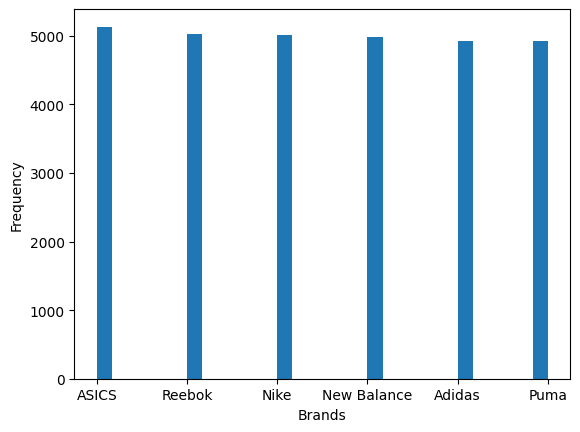

In [8]:
# Check the normal distribution of brands
data_to_plot = df_sales['brand']

plt.hist(x=data_to_plot, bins=30)

# Add x-axis and y-axis titles
plt.xlabel('Brands')
plt.ylabel('Frequency')

# Display the plot
plt.show()

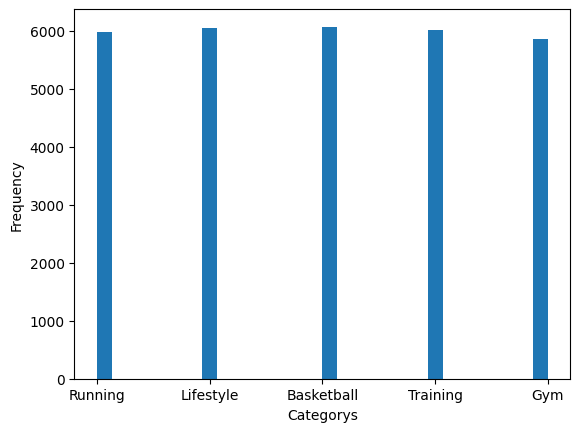

In [9]:
# Check the normal distribution of categorys of shoes
data_to_plot = df_sales['category']

plt.hist(x=data_to_plot, bins=30)

# Add x-axis and y-axis titles
plt.xlabel('Categorys')
plt.ylabel('Frequency')

# Display the plot
plt.show()

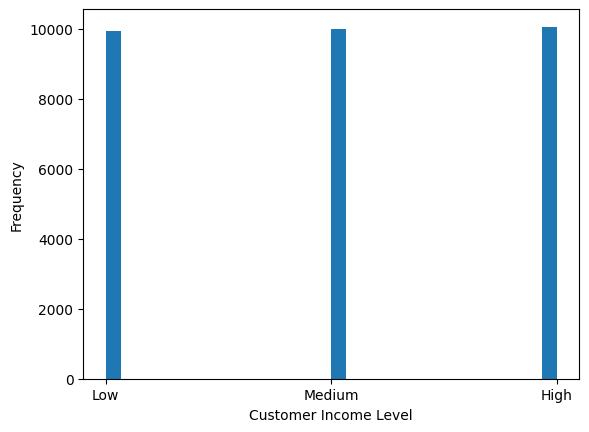

In [10]:
# Check the normal distribution of customer income level    
data_to_plot = df_sales['customer_income_level']

plt.hist(x=data_to_plot, bins=30)

# Add x-axis and y-axis titles
plt.xlabel('Customer Income Level')
plt.ylabel('Frequency')

# Display the plot
plt.show()

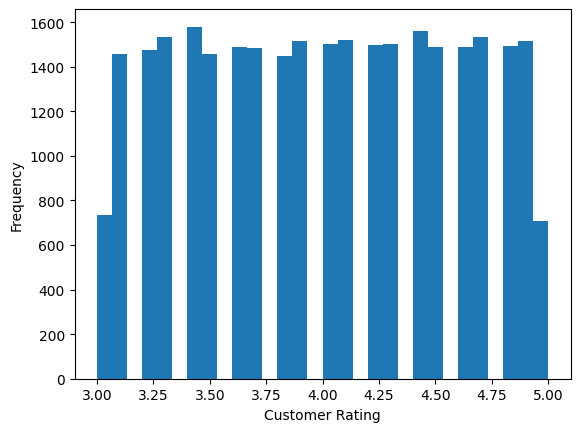

In [11]:
# Check the normal distribution of customer_rating
data_to_plot = df_sales['customer_rating']

plt.hist(x=data_to_plot, bins=30)

# Add x-axis and y-axis titles
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')

# Display the plot
plt.show()

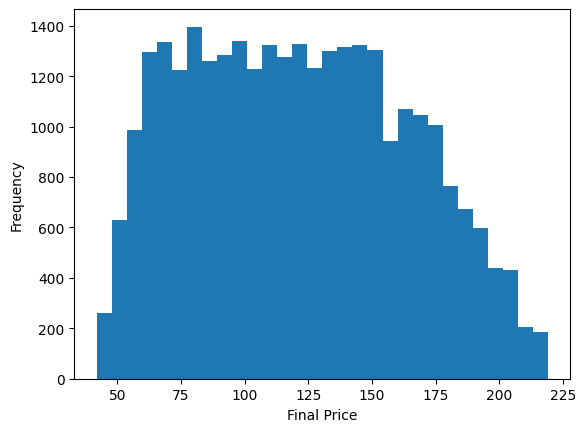

In [12]:
# Check the normal distribution of the producst Final Price in USD
data_to_plot = df_sales['final_price_usd']

plt.hist(x=data_to_plot, bins=30)

# Add x-axis and y-axis titles
plt.xlabel('Final Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## 4. Correlation check
By understanding how different variable associate with each other we can better understand their trends

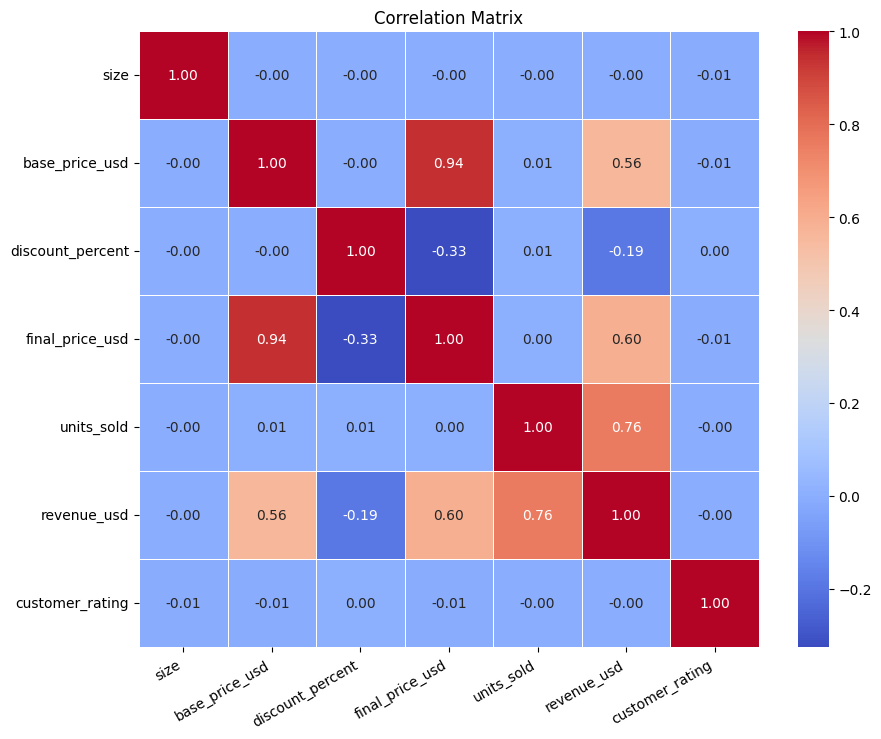

In [13]:
import seaborn as sns

# Only check the contious variables first
column_of_interest = ['size', 'base_price_usd', 'discount_percent', 'final_price_usd', 'units_sold', 'revenue_usd', 'customer_rating']

# Calculate the matrix
correlation_matrix = df_sales[column_of_interest].corr()

# Display it on a seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

## Key Findings from the Correlation Matrix without hot encoding:

- Revenue increases more through higher sales volume than through higher prices. Strategies focused on increasing demand and units sold are likely to be more effective than price increases alone.

- Discounts influence the final price but cannot offset a high base price. Setting the correct base price is the most important pricing decision.

- Customer ratings appear independent of pricing, sales volume, and revenue, suggesting they do not directly influence purchasing behavior in this dataset.

In [14]:
df_sales.sample(5)

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
17542,ORD117542,2025-08-05,New Balance,Model-760,Lifestyle,Unisex,11,White,147,0,147.00,4,588.00,Card,Online,USA,Medium,4.0
6720,ORD106720,2022-08-20,Puma,Model-597,Running,Unisex,6,Blue,87,0,87.00,1,87.00,Bank Transfer,Online,UK,High,3.4
8605,ORD108605,2023-01-15,New Balance,Model-247,Running,Men,8,White,100,0,100.00,4,400.00,Bank Transfer,Online,USA,Medium,3.8
4546,ORD104546,2023-10-18,Nike,Model-498,Lifestyle,Men,10,Black,175,5,166.25,3,498.75,Card,Online,USA,Low,3.3
27320,ORD127320,2021-08-30,Nike,Model-672,Lifestyle,Men,11,Blue,145,0,145.00,4,580.00,Cash,Retail Store,Pakistan,High,4.7


In [19]:
# Createa copy for saver execution
df_encoded = df_sales.copy()

columns_to_drop=['brand', 'category', 'gender', 'color', 'payment_method','sales_channel', 'country', 'customer_income_level', 'order_id', 'model_name', 'order_date']

# Change the format of the date column in order to work with it 
df_encoded['order_date'] = pd.to_datetime(df_encoded['order_date'])
df_encoded['year'] = df_encoded['order_date'].dt.year
df_encoded['month'] = df_encoded['order_date'].dt.month
df_encoded['quarter'] = df_encoded['order_date'].dt.quarter

# Drop unneccesarry information and not usable
df_encoded = df_encoded.drop(columns= columns_to_drop)

df_encoded.sample(5)

,size,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,customer_rating,year,month,quarter
27612,9,181,0,181.00,3,543.00,4.4,2019,9,3
2692,6,196,0,196.00,3,588.00,3.7,2018,1,1
27547,8,138,0,138.00,3,414.00,4.3,2024,6,2
14695,9,188,30,131.60,1,131.60,3.9,2019,7,3
21695,6,87,5,82.65,1,82.65,3.7,2024,12,4


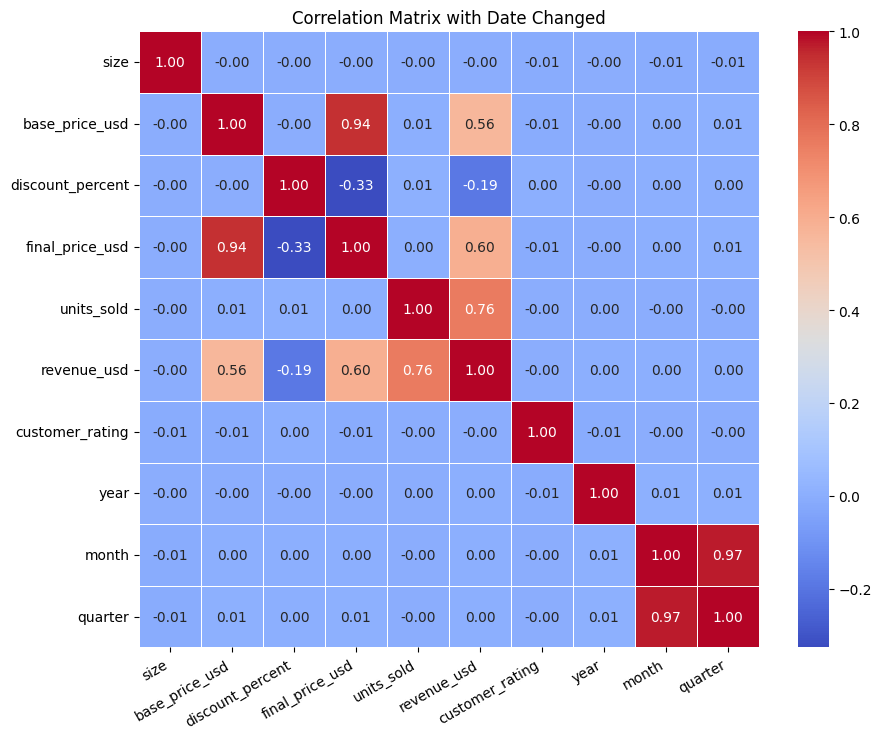

In [21]:
corr_matrix = df_encoded.corr()

# Display it on a seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix with Date Changed')
plt.xticks(rotation=30, ha='right')
plt.show()

In [22]:
df_brand_encode = df_sales.copy()

columns_to_drop=['category', 'gender', 'color', 'payment_method','sales_channel', 'country', 'customer_income_level', 'order_id', 'model_name', 'order_date']

# Change the format of the date column in order to work with it 
df_brand_encode['order_date'] = pd.to_datetime(df_brand_encode['order_date'])
df_brand_encode['year'] = df_brand_encode['order_date'].dt.year
df_brand_encode['month'] = df_brand_encode['order_date'].dt.month
df_brand_encode['quarter'] = df_brand_encode['order_date'].dt.quarter

df_brand_encode = pd.get_dummies(data= df_brand_encode, columns=['brand'])

# Drop unneccesarry information and not usable
df_brand_encode = df_brand_encode.drop(columns= columns_to_drop)

df_brand_encode.sample(5)

,size,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,customer_rating,year,month,quarter,brand_ASICS,brand_Adidas,brand_New Balance,brand_Nike,brand_Puma,brand_Reebok
4206,7,134,20,107.2,1,107.2,4.9,2021,10,4,False,False,False,True,False,False
2136,7,145,20,116.0,4,464.0,4.7,2019,8,3,False,False,False,True,False,False
3054,8,119,30,83.3,2,166.6,3.9,2026,12,4,True,False,False,False,False,False
24219,10,87,30,60.9,4,243.6,4.9,2025,6,2,True,False,False,False,False,False
8384,11,74,30,51.8,1,51.8,3.3,2026,9,3,False,False,False,False,False,True


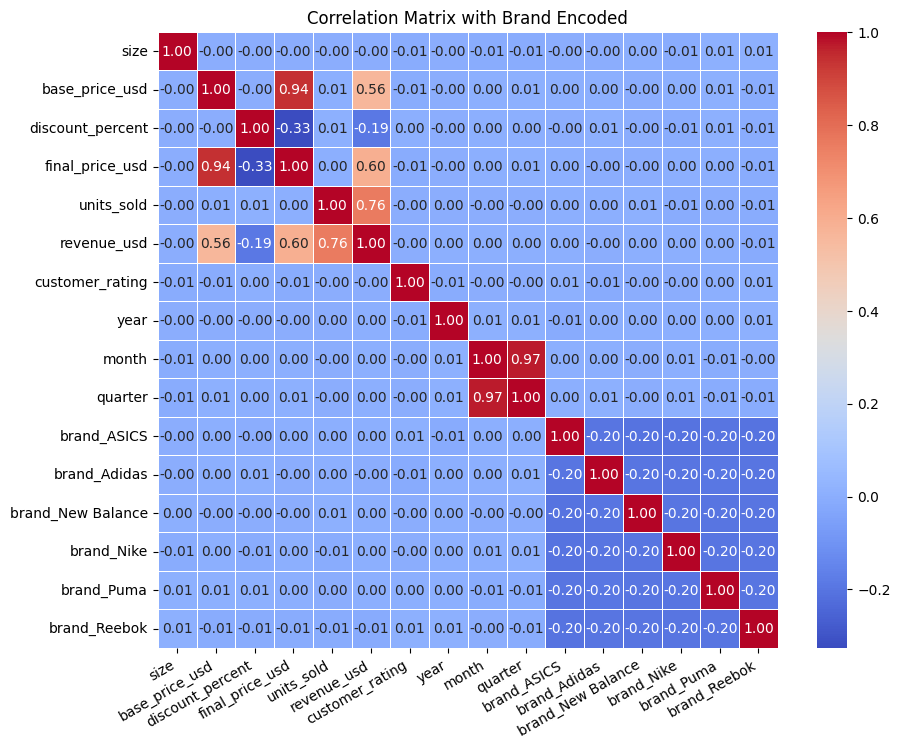

In [24]:
brand_corr_matrix = df_brand_encode.corr()

# Display it on a seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(brand_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix with Brand Encoded')
plt.xticks(rotation=30, ha='right')
plt.show()

## Impact of Brand and Time Variables on Correlation

From the correlation matrix, **brand-encoded variables and date-related features (year, month, quarter)** show **near-zero correlations** with key business metrics such as price, units sold, revenue, and customer ratings.

### Brand Variables
- One-hot encoded brand features (`brand_*`) exhibit **very weak correlations** with all numeric variables.
- Negative correlations between brand columns (≈ −0.20) are expected and **artificial**, caused by one-hot encoding (mutual exclusivity).
- No brand shows a meaningful linear relationship with revenue, pricing, or sales volume.

**Interpretation:**  
Brand identity, as encoded here, does not appear to be a strong linear driver of performance metrics in this dataset.

---

### Time Variables (Year, Month, Quarter)
- `year`, `month`, and `quarter` have **correlations close to zero** with revenue, units sold, prices, and ratings.
- The strong correlation between `month` and `quarter` (r ≈ 0.97) is structural and expected.
- No clear linear seasonality signal is captured through simple correlation.

**Interpretation:**  
Time-based features do not show meaningful **linear relationships**.

### Key Takeaway
Correlation analysis suggests that **brand and date features contribute little explanatory power** in a linear context.  